In [1]:
from keras.models import Model

In [11]:
model = Model(inputs = x, outputs = [output1, output2])

In [2]:
from keras.layers import *

In [9]:
x = Input(shape = (3,))

In [10]:
hidden1 = Dense(128, activation = 'relu')(x)
hidden2 = Dense(64, activation = 'relu')(hidden1)

output1= Dense(1, activation = 'linear')(hidden2)
output2= Dense(1, activation = 'sigmoid')(hidden2)

In [12]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 3)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 128)            │            512 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 64)             │          8,256 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 1)              │             65 │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │             65 │ dense_5[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,898 (34.76 KB)

 Trainable params: 8,898 (34.76 KB)

 Non-trainable params: 0 (0.00 B)

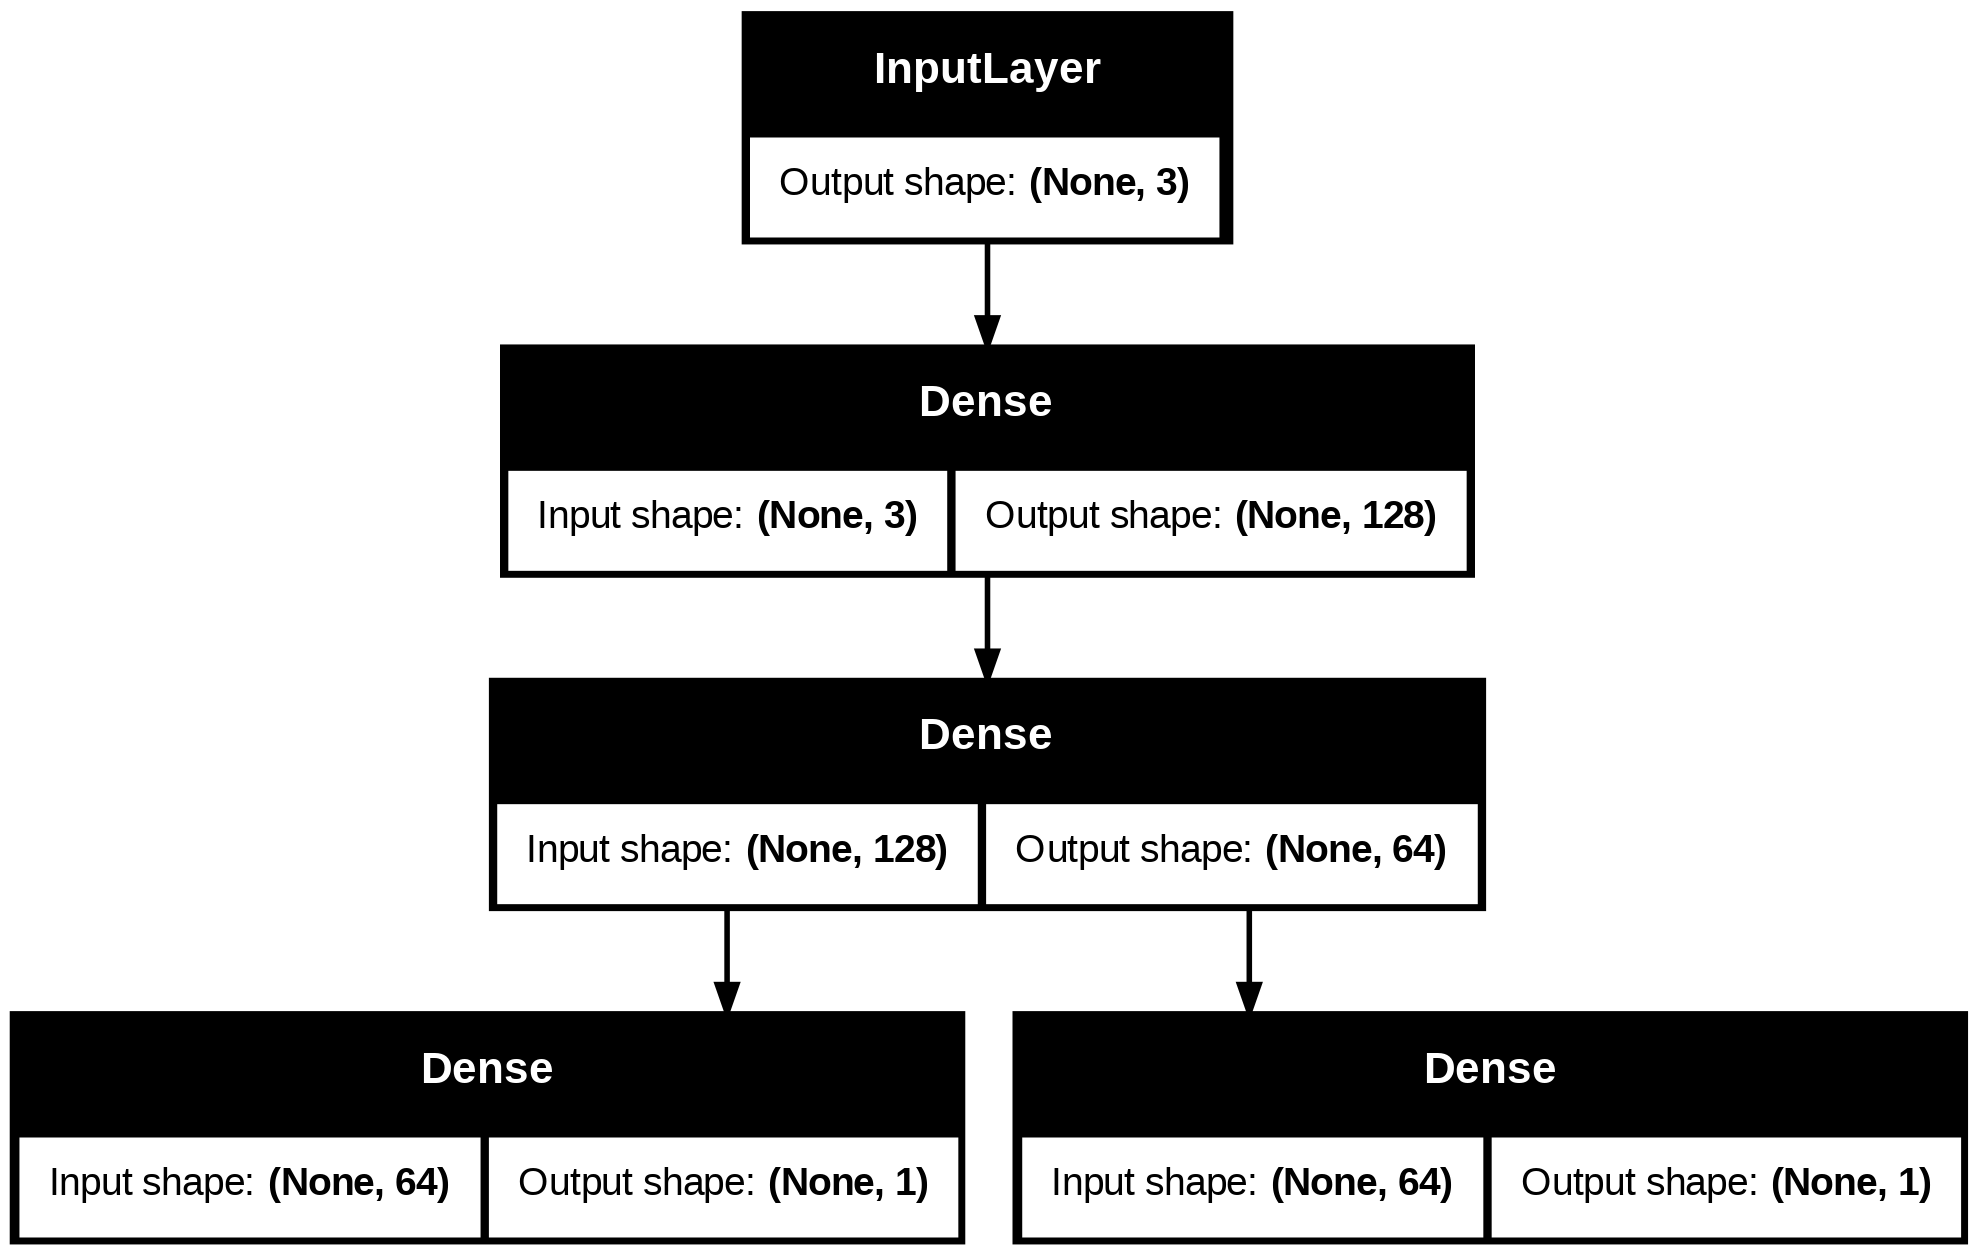

In [14]:
from keras.utils import plot_model
plot_model(model, show_shapes = True)

## **Functional API multiple input**

In [15]:
from keras.layers import *
from keras.models import Model

In [16]:
# define two sets of inputs
inputA = Input(shape =(32,))
inputB = Input(shape =(128,))

In [17]:
# the first branch operates on the first input
x = Dense(8, activation = 'relu')(inputA)
x1 = Dense(4, activation = 'relu')(x)

In [18]:
from ast import AsyncFunctionDef
# the second branch operates on the second input
y = Dense(64, activation= 'relu')(inputB)
y1 = Dense(32, activation= 'relu')(y)
y2 = Dense(16, activation= 'relu')(y1)

In [19]:
# combine the output of the two branches
combine = concatenate([x1, y2])

In [20]:
# apply a FC layer and then regression prediction on the combined outputs
z = Dense(2, activation = 'linear')(combine)
z = Dense(1, activation = 'linear')(z)

In [21]:
# our model will accept the inputs of the two branchs and then output a single value
model = Model(inputs = [inputA, inputB], outputs = z)

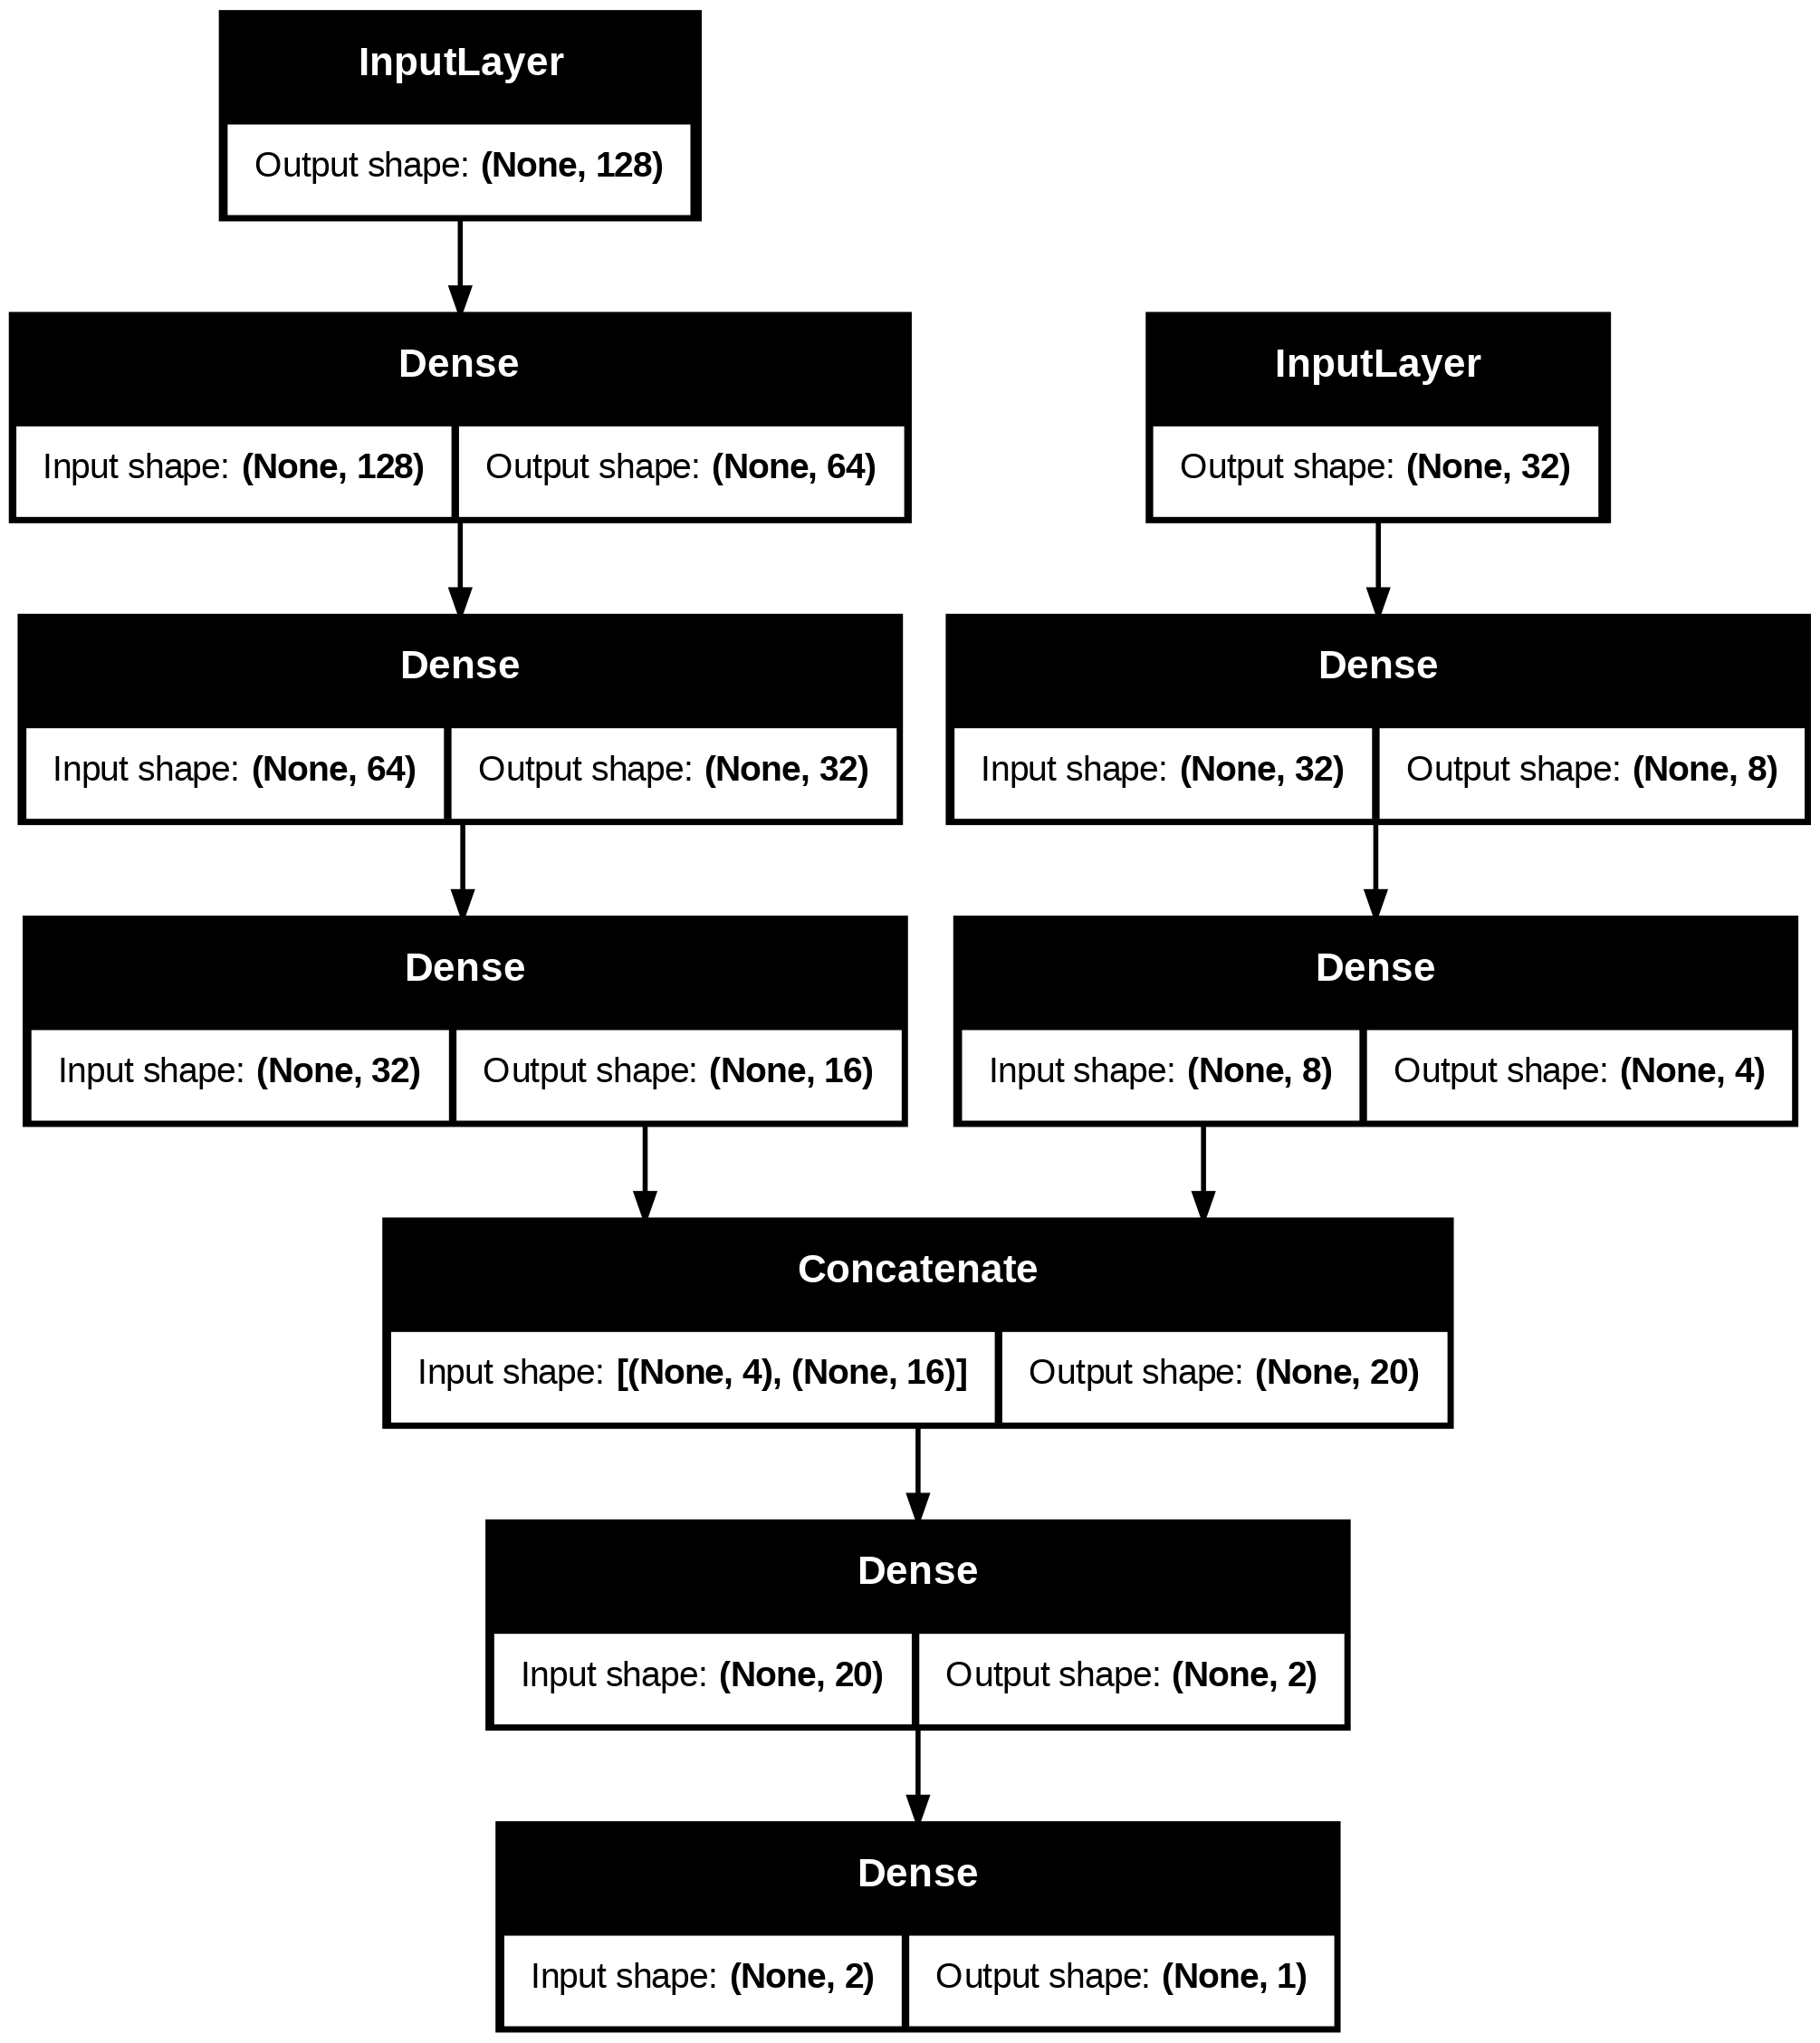

In [22]:
from keras.utils import plot_model
plot_model(model, show_shapes = True)